<a href="https://colab.research.google.com/github/miguel-garces/Geol-Time-Scale/blob/main/GPTS_builder_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code runs on google colab. It
plots the Gemagnetic Polarity Time Scale and orbital solutions of eccentricity, obliquity and precession for the last 65Ma.
The time interval to plot is set with the variables minAge and maxAge, in the las block of code

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # and of course Pandas
import numpy as np
from matplotlib.patches import Rectangle

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/miguel-garces/Geol-Time-Scale cloned-repo

%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (26/26), 2.36 MiB | 4.84 MiB/s, done.
Resolving deltas: 100% (8/8), done.
/content/cloned-repo
 gpts1995-2020.xlsx	 GPTS.ipynb			 README.md
 GPTS_builder_v2.ipynb	'laskar2004-100Ma_mean annual'


In [ ]:
laskar2004=pd.read_csv('laskar2004-100Ma_mean annual', delimiter= '\s+', header=None)
laskar2004.columns = ["Age(Myr)", "eccentricity", 'precession', "obliquity", "annual insolation"]
laskar2004["Age(Myr)"] = -0.001*laskar2004["Age(Myr)"]

In [ ]:
laskar2004.head()

,Age(Myr),eccentricity,precession,obliquity,annual insolation
0,100.000,0.025067,0.025026,0.407037,342.107499
1,99.999,0.025403,0.023597,0.407379,342.110402
2,99.998,0.025716,0.019669,0.407615,342.113141
3,99.997,0.026040,0.013689,0.407742,342.116011
4,99.996,0.026288,0.006020,0.407753,342.118232


In [ ]:
#read file with age of chrons
file = "gpts1995-2020.xlsx"
xls = pd.ExcelFile(file)
datafile = xls.parse(0) #first sheet (0) of the excel file parsed to variable

In [ ]:
datafile

,Magnetochron-base,epoch,CK1995,GTS2004,GTS2012,GTS2016,GTS2020,Sources of calibration used in GTS2020
0,NaN,NaN,0.00,0.000,0.000,0.000,0.000,NaN
1,C1n,(Brunhes),0.78,0.781,0.781,0.773,0.773,no change from GTS2016
2,C1r.1r,(Matuyama),0.99,0.988,0.988,1.008,1.008,NaN
3,C1r.1n,(Jaramillo),1.07,1.072,1.072,1.076,1.076,NaN
4,C1r.2r,NaN,NaN,1.173,1.173,1.189,1.189,NaN
...,...,...,...,...,...,...,...,...
184,C32r.1r,NaN,NaN,NaN,NaN,NaN,73.951,NaN
185,C32r.1n,NaN,NaN,NaN,NaN,NaN,74.051,NaN
186,C32r.2r,NaN,NaN,NaN,NaN,NaN,74.201,NaN
187,C33n,NaN,NaN,NaN,NaN,NaN,79.900,NaN


In [ ]:
#read file with age of stages and epochs
file = "gpts1995-2020.xlsx"
xls = pd.ExcelFile(file)
chronostrat = xls.parse(1) #first sheet (0) of the excel file parsed to variable

In [ ]:
chronostrat

,Period,Age,Stage,GTS2020 (Ma)
0,-,-,-,0.000
1,NaN,Holocene,NaN,0.118
2,NaN,NaN,Tarantian,0.130
3,NaN,NaN,Chibanian,0.773
4,NaN,NaN,Calabrian,1.800
5,Quaternary,Pleistocene,Gelasian,2.580
6,NaN,NaN,Piacenzian,3.600
7,NaN,Pliocene,Zanclean,5.340
8,NaN,NaN,Messinian,7.246
9,NaN,NaN,Tortonian,11.630


In [ ]:
chrono_age = chronostrat.replace('', np.NaN)
chrono_age = chrono_age.dropna(subset=['Age'])
chrono_age = chrono_age.reset_index(drop = True)

In [ ]:
chrono_age

,Period,Age,Stage,GTS2020 (Ma)
0,-,-,-,0.000
1,NaN,Holocene,NaN,0.118
2,Quaternary,Pleistocene,Gelasian,2.580
3,NaN,Pliocene,Zanclean,5.340
4,Neogene,Miocene,Aquitanian,23.040
5,NaN,Oligocene,Rupelian,33.900
6,NaN,Eocene,Ypresian,56.000
7,Paleogene,Paleocene,Danian,66.040


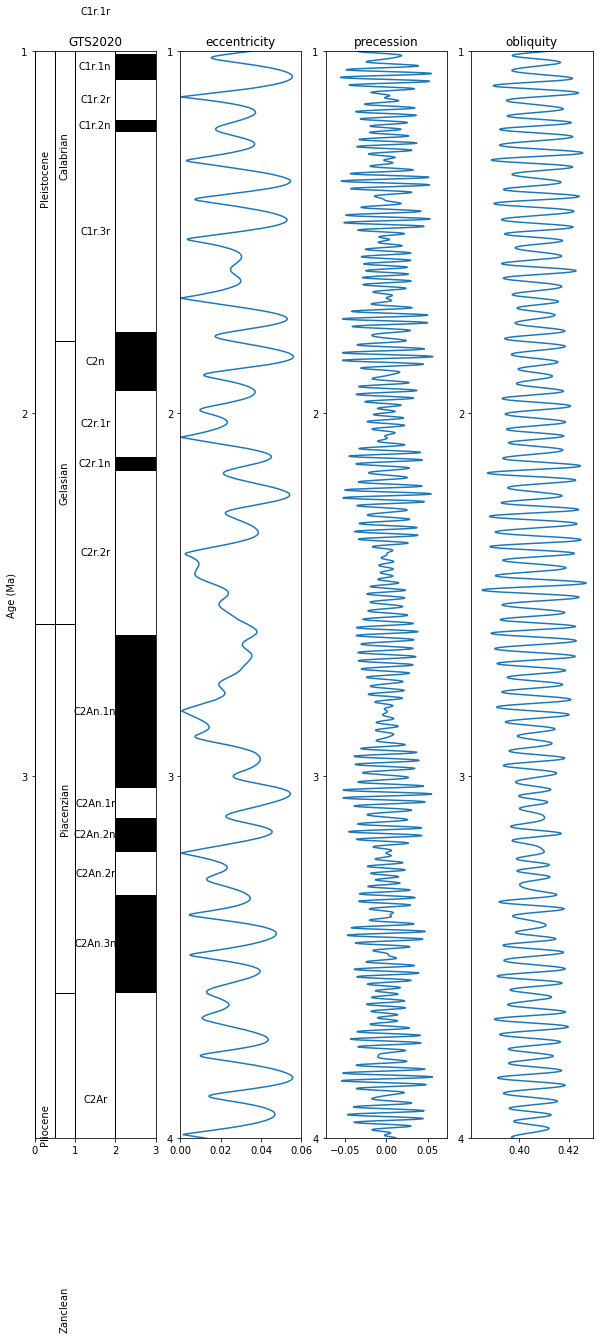

In [ ]:
#select age range to plot
minAge = 1
maxAge = 4

fig = plt.subplots(figsize=(10, 20))
ax1 = plt.subplot(1,4,1)

#drawing polarity column
width = 1
for value in range(len(datafile[datafile['GTS2020']<=minAge]),1+len(datafile[datafile['GTS2020']<maxAge])):
    bottom_left = (2,datafile.loc[value-1,'GTS2020'])
    height = datafile.loc[value,'GTS2020']-datafile.loc[value-1,'GTS2020']
    midpoint_height = (datafile.loc[value,'GTS2020']+datafile.loc[value-1,'GTS2020'])/2
    polarity = datafile.loc[value,'Magnetochron-base'][-1:]
    if polarity == 'n':
        fill = 'black'
    else:
        fill = 'white'
    ax1.add_patch(Rectangle(bottom_left, width, height, angle=0.0, facecolor =fill, edgecolor = 'black'))
    ax1.text(1.5, midpoint_height, datafile.loc[value,'Magnetochron-base'], horizontalalignment='center', verticalalignment='center',
         rotation='0')

#drawing stage column
width = 0.5
for value in range(len(chronostrat[chronostrat['GTS2020 (Ma)']<=minAge]),1+len(chronostrat[chronostrat['GTS2020 (Ma)']<maxAge])):
    bottom_left = (0.5,chronostrat.loc[value-1,'GTS2020 (Ma)'])
    height = chronostrat.loc[value,'GTS2020 (Ma)']-chronostrat.loc[value-1,'GTS2020 (Ma)']
    midpoint_height = (chronostrat.loc[value,'GTS2020 (Ma)']+chronostrat.loc[value-1,'GTS2020 (Ma)'])/2
    ax1.add_patch(Rectangle(bottom_left, width, height, angle=0.0, facecolor ='white', edgecolor = 'black'))
    ax1.text(0.75, midpoint_height, chronostrat.loc[value,'Stage'], horizontalalignment='center', verticalalignment='center',
         rotation='90')

# drawing Age column    
width = 0.5
for value in range(len(chrono_age[chrono_age['GTS2020 (Ma)']<=minAge]),1+len(chrono_age[chrono_age['GTS2020 (Ma)']<maxAge])):
    bottom_left = (0,chrono_age.loc[value-1,'GTS2020 (Ma)'])
    height = chrono_age.loc[value,'GTS2020 (Ma)']-chrono_age.loc[value-1,'GTS2020 (Ma)']
    midpoint_height = (chrono_age.loc[value,'GTS2020 (Ma)']+chrono_age.loc[value-1,'GTS2020 (Ma)'])/2
    ax1.add_patch(Rectangle(bottom_left, width, height, angle=0.0, facecolor ='white', edgecolor = 'black'))
    ax1.text(0.25, midpoint_height, chrono_age.loc[value,'Age'], horizontalalignment='center', verticalalignment='center',
         rotation='90')
    
#plt.xlabel("X-AXIS")
plt.title("GTS2020")
plt.ylabel("Age (Ma)")
plt.xlim(left = 0, right = 3)
plt.ylim(bottom = minAge, top = maxAge)
plt.yticks(np.arange(minAge, maxAge, 1))
plt.gca().invert_yaxis()


ax2 = plt.subplot(1,4,2)
age = laskar2004['Age(Myr)']
eccentricity = laskar2004['eccentricity']
plt.plot(eccentricity, age)
plt.title("eccentricity")
plt.xlim(left = 0, right = 0.06)
plt.ylim(bottom = minAge, top = maxAge)
plt.yticks(np.arange(minAge, maxAge+1, 1))
plt.gca().invert_yaxis()

ax3 = plt.subplot(1,4,3)
age = laskar2004['Age(Myr)']
eccentricity = laskar2004['precession']
plt.plot(eccentricity, age)
plt.title("precession")
#plt.xlim(left = 0, right = 0.06)
plt.ylim(bottom = minAge, top = maxAge)
plt.yticks(np.arange(minAge, maxAge+1, 1))
plt.gca().invert_yaxis()

ax4 = plt.subplot(1,4,4)
age = laskar2004['Age(Myr)']
eccentricity = laskar2004['obliquity']
plt.plot(eccentricity, age)
plt.title("obliquity")
#plt.xlim(left = 0, right = 0.06)
plt.ylim(bottom = minAge, top = maxAge)
plt.yticks(np.arange(minAge, maxAge+1, 1))
plt.gca().invert_yaxis()

# saving plot to file
from google.colab import drive
drive.mount('/gdrive')

plt.savefig('/gdrive/My Drive/GTS'+str(minAge)+'-'+str(maxAge)+'Ma.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', format='pdf', transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

plt.show()